In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\Abhishek\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [16]:
train = pd.read_csv('./data/train.csv', index_col='id', encoding="ISO-8859-1")
test = pd.read_csv('./data/test.csv', index_col='id', encoding="ISO-8859-1")

products_description = pd.read_csv('./data/product_descriptions.csv')
prod_attributes = pd.read_csv('./data/attributes.csv')

In [17]:
attributes = prod_attributes[prod_attributes.name == "MFG Brand Name"][["product_uid", "value"]].rename(columns={"value": "brand"})

In [4]:
# merge datasets
train_merged = pd.merge(train, products_description, how='left', on='product_uid')
test_merged = pd.merge(test, products_description, how='left', on='product_uid')

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
vec = CountVectorizer()
bow = vec.fit_transform(train_merged.search_term)

In [7]:
import nltk

In [10]:
search_terms_text = ' '.join(train_merged.search_term)
search_terms = search_terms_text.split()

In [11]:
search_terms_freq = nltk.FreqDist(search_terms)

In [12]:
search_terms_freq.most_common(50)

[(u'door', 2643),
 (u'light', 1976),
 (u'for', 1803),
 (u'in', 1657),
 (u'inch', 1485),
 (u'wall', 1423),
 (u'shower', 1421),
 (u'with', 1416),
 (u'white', 1351),
 (u'wood', 1317),
 (u'x', 1302),
 (u'tile', 1288),
 (u'and', 1156),
 (u'paint', 1112),
 (u'cabinet', 1061),
 (u'outdoor', 1033),
 (u'water', 1015),
 (u'vanity', 956),
 (u'kitchen', 949),
 (u'bathroom', 946),
 (u'doors', 941),
 (u'gas', 916),
 (u'lights', 840),
 (u'air', 821),
 (u'led', 802),
 (u'sink', 786),
 (u'2', 780),
 (u'1/2', 772),
 (u'ceiling', 772),
 (u'faucet', 766),
 (u'kit', 760),
 (u'4', 733),
 (u'floor', 728),
 (u'saw', 714),
 (u'pipe', 712),
 (u'black', 709),
 (u'steel', 699),
 (u'fan', 696),
 (u'window', 684),
 (u'lighting', 668),
 (u'electric', 664),
 (u'1', 637),
 (u'glass', 622),
 (u'metal', 603),
 (u'heater', 596),
 (u'3', 588),
 (u'toilet', 580),
 (u'wire', 568),
 (u'6', 564),
 (u'pvc', 564)]

In [13]:
brand_freq = nltk.FreqDist(attributes.brand)

In [15]:
brand_freq.most_common(20)

[('Unbranded', 2954),
 ('Hampton Bay', 1723),
 ('KOHLER', 1389),
 ('Everbilt', 1381),
 ('Home Decorators Collection', 1275),
 ('GE', 987),
 ('Prime-Line', 931),
 ('Crown Bolt', 878),
 ('Delta', 853),
 ('DEWALT', 675),
 ('Milwaukee', 618),
 ('American Standard', 592),
 ('Philips', 565),
 ('Husky', 533),
 ('MOEN', 518),
 ('Daltile', 491),
 ('BEHR Premium Plus Ultra', 455),
 ('Glacier Bay', 420),
 ('Makita', 403),
 ('Lithonia Lighting', 397)]

In [21]:
prod_attributes.name.value_counts()

MFG Brand Name                          86250
Bullet02                                86248
Bullet03                                86226
Bullet04                                86174
Bullet01                                85940
Product Width (in.)                     61137
Bullet05                                60529
Product Height (in.)                    54698
Product Depth (in.)                     53652
Product Weight (lb.)                    45175
Bullet06                                44901
Color Family                            41508
Bullet07                                34349
Material                                31500
Color/Finish                            28564
Bullet08                                26645
Certifications and Listings             24583
Bullet09                                20567
Assembled Height (in.)                  18299
Assembled Width (in.)                   18263
Assembled Depth (in.)                   18198
Product Length (in.)              

In [24]:
# import module for regular expression
import re

In [41]:
dimensions_regex = r'[0-9]+[ ]*x[ ]*[0-9]+[ ]*(?:x[ ]*[0-9]+)?'

In [44]:
re.findall(dimensions_regex, 'This drum is of the size 9 x4 x 6')[0].split('x')

['9 ', '4 ', ' 6']

In [70]:
width = prod_attributes[prod_attributes.name == "Product Width (in.)"][["product_uid", "value"]].rename(columns={"value": "width"})

In [71]:
color = prod_attributes[prod_attributes.name == "Color Family"][["product_uid", "value"]].rename(columns={"value": "color"})

In [73]:
train_merged  = pd.merge(train_merged, width, on='product_uid', how='left')

In [74]:
train_merged = pd.merge(train_merged, color, on='product_uid', how='left')

In [90]:
train_merged = pd.merge(train_merged, attributes, on='product_uid', how='left')

In [91]:
train_merged.head()

,product_uid,product_title,search_term,relevance,product_description,width,color,has_color,brand
0,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,"Not only do angles make joints stronger, they ...",3,NaN,1,Simpson Strong-Tie
1,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"Not only do angles make joints stronger, they ...",3,NaN,1,Simpson Strong-Tie
2,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,BEHR Premium Textured DECKOVER is an innovativ...,NaN,Browns / Tans,0,BEHR Premium Textured DeckOver
3,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Update your bathroom with the Delta Vero Singl...,7.09,Chrome,0,Delta
4,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Update your bathroom with the Delta Vero Singl...,7.09,Chrome,0,Delta


In [54]:
def has_digit(text):
    return int(any(char.isdigit() for char in text))

train_with_width['has_digit'] = train_with_width.search_term.map(has_digit)

In [58]:
train_with_width['search_term_len'] = train_with_width.search_term.map(lambda x: len(x.split()))

In [60]:
def num_expressive_terms(text):
    return len([word for word in text.split() if len(word) >= 6])

train_with_width['num_expressive_words'] = train_with_width.search_term.map(num_expressive_terms)

In [67]:
def has_dimension(text):
    return int(len(re.findall(dimensions_regex, text)) > 0)

train_with_width['has_dimension'] = train_with_width.search_term.map(has_dimension)

In [87]:
def has_color(color):
    return int(pd.isnull(color))

train_merged['has_color'] = train_merged.color.map(has_color)

In [92]:
def is_unbranded(brand):
    return brand == 'Unbranded'

train_merged['is_unbranded'] = train_merged.brand.map(is_unbranded)

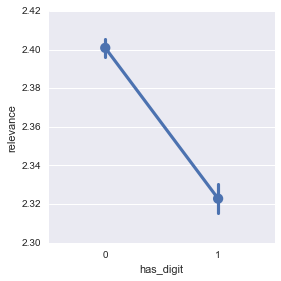

In [57]:
sns.factorplot(x='has_digit', y='relevance', data=train_merged);

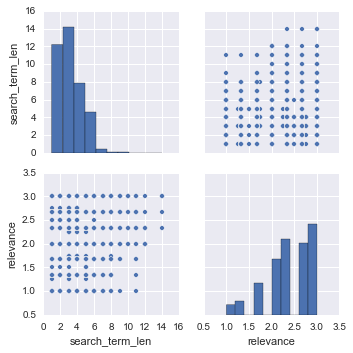

In [59]:
sns.pairplot(train_merged, vars=['search_term_len', 'relevance']);

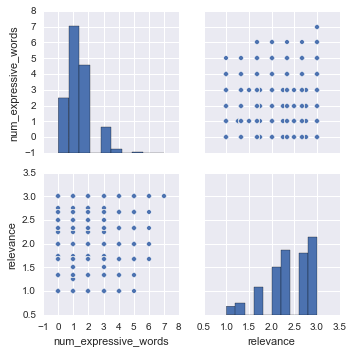

In [62]:
sns.pairplot(train_merged, vars=['num_expressive_words', 'relevance']);

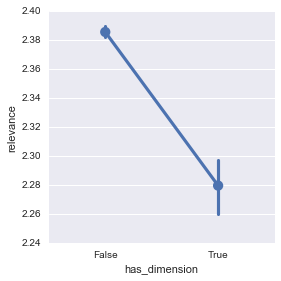

In [65]:
sns.factorplot(x='has_dimension', y='relevance', data=train_merged);

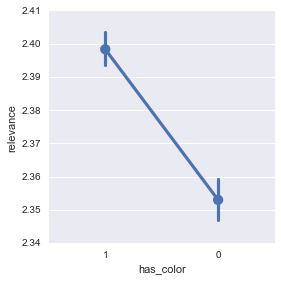

In [88]:
sns.factorplot(x='has_color', y='relevance', data=train_merged);

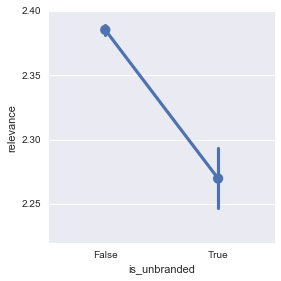

In [93]:
sns.factorplot(x='is_unbranded', y='relevance', data=train_merged);